# Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Data:

In [2]:
df = pd.read_csv(r"C:\Users\dell6\OneDrive\Desktop\Yashu jobs\By Yashu\Alfido Tech\Tasks\Task 1 Weather Data.csv")

# Data Exploration:

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.shape

(8784, 8)

In [5]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Data Cleaning:

### Duplicate Values:

In [7]:
df.duplicated().sum()

0

There are no Duplicate values present in the dataset.

### Null Values:

In [8]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

There are no Null values present in the dataset.

### Noise Values:

In [9]:
for i in df:
    print(i, df[i].sort_values().unique(), '\n')

Date/Time ['1/1/2012 0:00' '1/1/2012 10:00' '1/1/2012 11:00' ... '9/9/2012 7:00'
 '9/9/2012 8:00' '9/9/2012 9:00'] 

Temp_C [-23.3 -23.2 -22.8 -22.2 -21.4 -21.3 -21.2 -21.1 -21.  -20.7 -20.6 -20.3
 -20.  -19.9 -19.6 -19.5 -19.3 -19.2 -19.1 -19.  -18.7 -18.6 -18.5 -18.4
 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7 -17.6 -17.5 -17.4 -17.3 -17.2
 -17.1 -17.  -16.9 -16.8 -16.7 -16.6 -16.4 -16.3 -16.2 -16.1 -16.  -15.9
 -15.8 -15.7 -15.5 -15.4 -15.3 -15.2 -15.1 -15.  -14.9 -14.8 -14.7 -14.6
 -14.5 -14.4 -14.3 -14.2 -14.  -13.9 -13.8 -13.7 -13.6 -13.5 -13.4 -13.3
 -13.2 -13.1 -13.  -12.9 -12.8 -12.7 -12.6 -12.5 -12.4 -12.3 -12.2 -12.1
 -12.  -11.9 -11.8 -11.7 -11.6 -11.5 -11.4 -11.3 -11.2 -11.1 -11.  -10.9
 -10.8 -10.7 -10.6 -10.5 -10.4 -10.3 -10.2 -10.1 -10.   -9.9  -9.8  -9.7
  -9.6  -9.5  -9.4  -9.3  -9.2  -9.1  -9.   -8.9  -8.8  -8.7  -8.6  -8.5
  -8.4  -8.3  -8.2  -8.1  -8.   -7.9  -7.8  -7.7  -7.6  -7.5  -7.4  -7.3
  -7.2  -7.1  -7.   -6.9  -6.8  -6.7  -6.6  -6.5  -6.4  -6.3  -6.2  -6.1


There are no Noise values present in the dataset.

# Data Types:

In [10]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

The Date/Time column's data type is not suitable; it should be in the Date format.

In [11]:
from datetime import date

In [12]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [13]:
df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

# Data Visualization:

### 1. Weather Distribution:

In [14]:
colors = ['red', 'blue', 'green', 'purple', 'gray', 'brown']

In [15]:
a = df['Weather'].value_counts().sort_values(ascending = True).tail(15)
a

Rain,Snow              18
Snow,Blowing Snow      19
Snow,Fog               37
Drizzle                41
Snow Showers           60
Drizzle,Fog            80
Rain,Fog              116
Fog                   150
Rain Showers          188
Rain                  306
Snow                  390
Clear                1326
Cloudy               1728
Mostly Cloudy        2069
Mainly Clear         2106
Name: Weather, dtype: int64

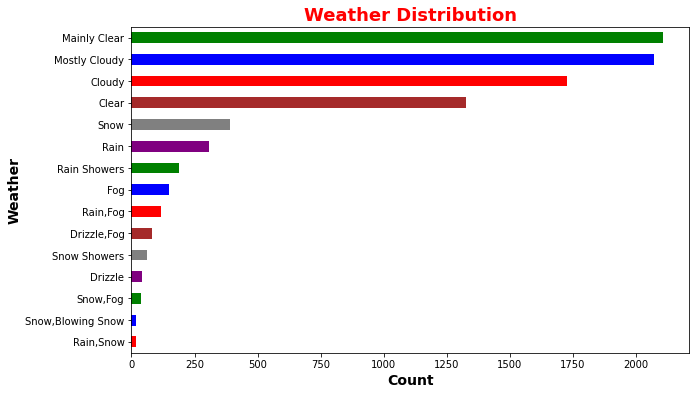

In [16]:
plt.figure(figsize=(10,6))
a.plot(kind = 'barh', color = colors)
    
plt.xlabel('Count', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('Weather', color = 'Black', fontweight='bold', fontsize=14)
plt.title('Weather Distribution', color = 'red', fontweight='bold', fontsize=18)
plt.show()

### 2. Relationship between Numeric Variables:

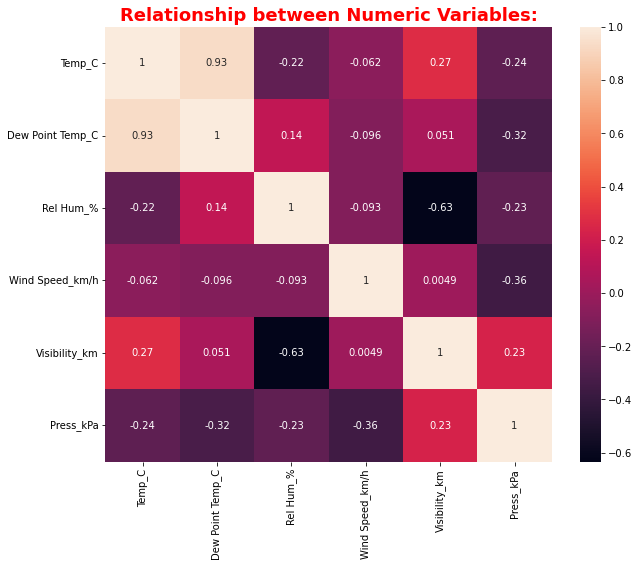

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

plt.title('Relationship between Numeric Variables:', color = 'red', fontweight='bold', fontsize=18)
plt.show()

### 3. Pair Plot:

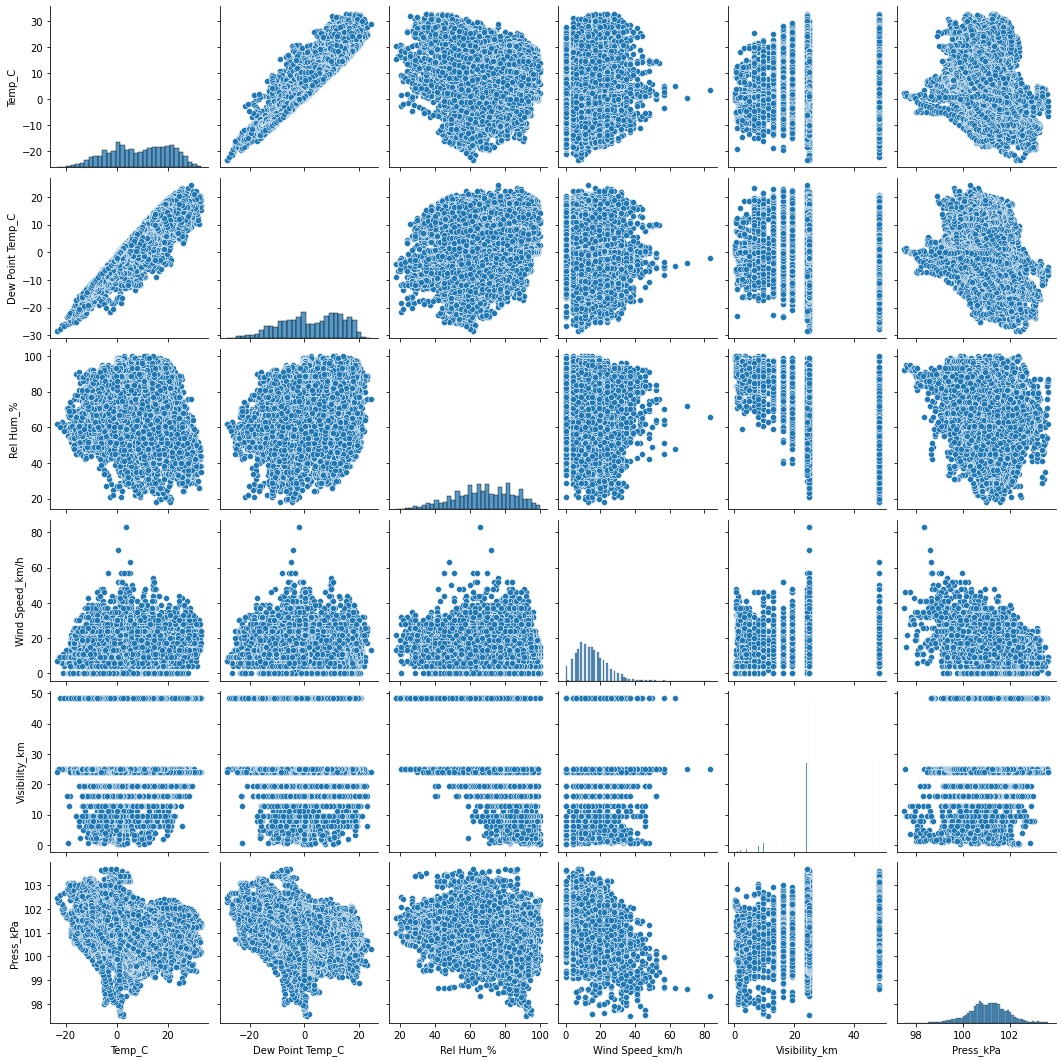

In [18]:
sns.pairplot(df)

### 4. Average Temperature by Weather Condition:

In [19]:
a = df.groupby('Weather')['Temp_C'].mean().sort_values(ascending = True). reset_index()
a

,Weather,Temp_C
0,"Snow Showers,Fog",-10.675000
1,Freezing Fog,-7.575000
2,Freezing Drizzle,-5.657143
3,Moderate Snow,-5.525000
4,"Moderate Snow,Blowing Snow",-5.450000
5,"Freezing Drizzle,Haze",-5.433333
6,"Snow,Blowing Snow",-5.410526
7,"Freezing Drizzle,Snow",-5.109091
8,"Snow,Fog",-5.075676
9,"Freezing Rain,Snow Grains",-5.000000


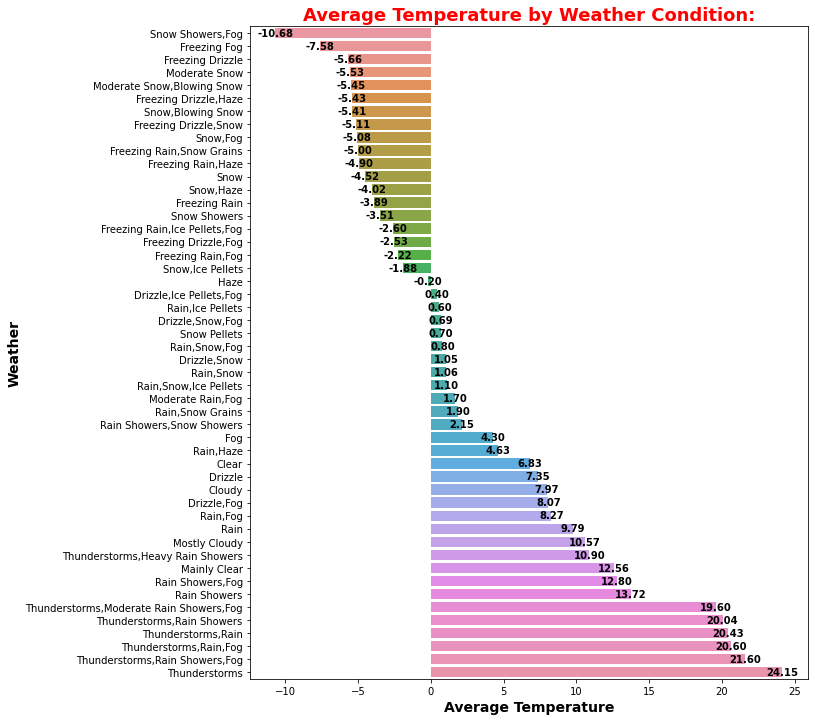

In [20]:
plt.figure(figsize=(10,12))
sns.barplot(y = a['Weather'], x = a['Temp_C'])

for index, value in enumerate(a['Temp_C']):
    plt.text(value, index, f'{value:.2f}', fontweight='bold', ha='center', va='center')

plt.title('Average Temperature by Weather Condition:', color = 'red', fontweight='bold', fontsize=18)
plt.xlabel('Average Temperature', color = 'Black' , fontweight='bold', fontsize=14)
plt.ylabel('Weather', color = 'Black', fontweight='bold', fontsize=14)
plt.show()

### 5. Monthly Average Wind Speed

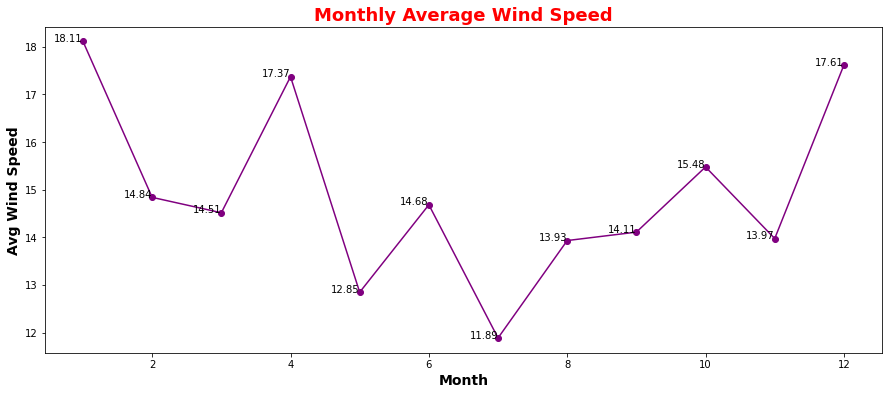

In [21]:
monthly_avg_wind_speed = df.groupby(df['Date/Time'].dt.month)['Wind Speed_km/h'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_avg_wind_speed, marker='o', linestyle='-', color='purple')

for month, speed in monthly_avg_wind_speed.items():
    plt.text(month, speed, f'{speed:.2f}', ha='right') 

plt.title('Monthly Average Wind Speed', color = 'red', fontweight='bold', fontsize=18)
plt.xlabel('Month', color = 'black', fontweight='bold', fontsize=14)
plt.ylabel('Avg Wind Speed', color = 'black', fontweight='bold', fontsize=14)
plt.show()

### 6.  Maximum Visibility in Every Weather Condition:

In [22]:
b = df.groupby('Weather')['Visibility_km'].max().sort_values(ascending = False).reset_index()
b

,Weather,Visibility_km
0,Clear,48.3
1,Mainly Clear,48.3
2,Snow Showers,48.3
3,Cloudy,48.3
4,Rain,48.3
5,Mostly Cloudy,48.3
6,Rain Showers,48.3
7,"Rain,Snow",25.0
8,"Thunderstorms,Rain Showers",25.0
9,Thunderstorms,25.0


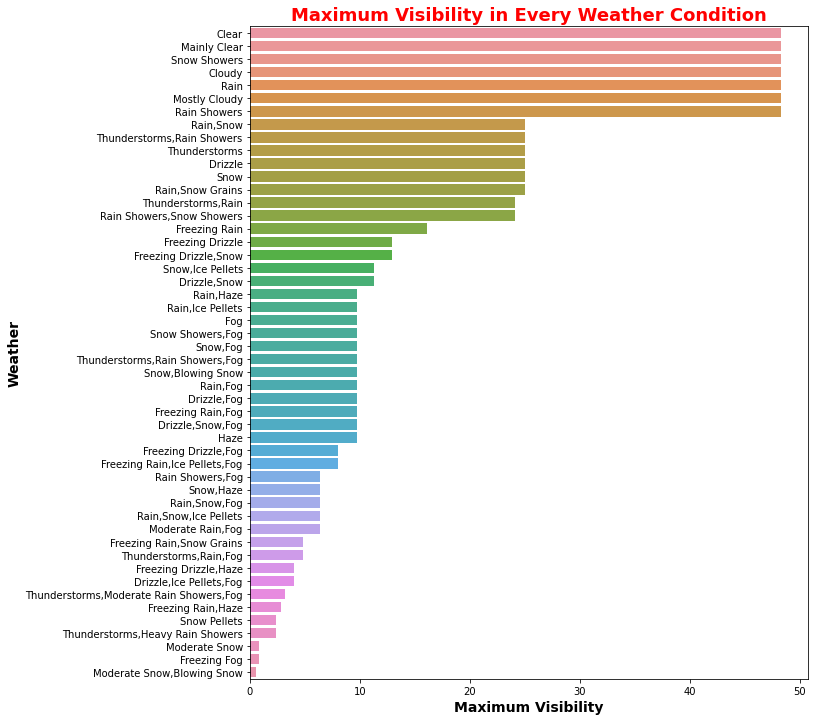

In [23]:
plt.figure(figsize=(10,12))
sns.barplot(y = b['Weather'], x = b['Visibility_km'])

plt.title('Maximum Visibility in Every Weather Condition', color = 'red', fontweight='bold', fontsize=18)
plt.xlabel('Maximum Visibility', color = 'Black' , fontweight='bold', fontsize=14)
plt.ylabel('Weather', color = 'Black', fontweight='bold', fontsize=14)
plt.show()

### 7. Max Relative Humidity for Each Weather Condition:

In [24]:
c = df.groupby('Weather')['Rel Hum_%'].max().sort_values(ascending = False).reset_index()
c

,Weather,Rel Hum_%
0,"Drizzle,Fog",100
1,"Rain,Fog",100
2,Fog,100
3,Mostly Cloudy,100
4,Clear,99
5,Freezing Fog,99
6,"Snow,Fog",99
7,Cloudy,99
8,Rain,99
9,Mainly Clear,99


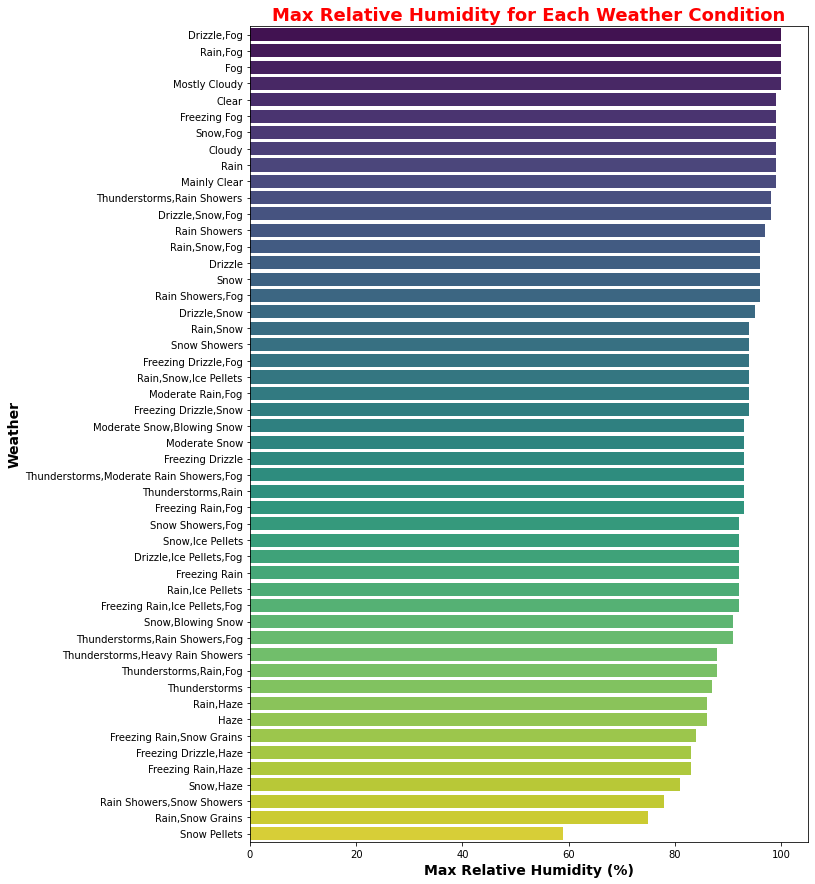

In [25]:
plt.figure(figsize=(10, 15))
sns.barplot(x='Rel Hum_%', y='Weather', data=c, palette='viridis')

plt.xlabel('Max Relative Humidity (%)', color = 'Black' , fontweight='bold', fontsize=14)
plt.ylabel('Weather', color = 'Black' , fontweight='bold', fontsize=14)
plt.title('Max Relative Humidity for Each Weather Condition', color = 'red', fontweight='bold', fontsize=18)

plt.show()

### 8. Monthly Average Atmospheric Pressure:

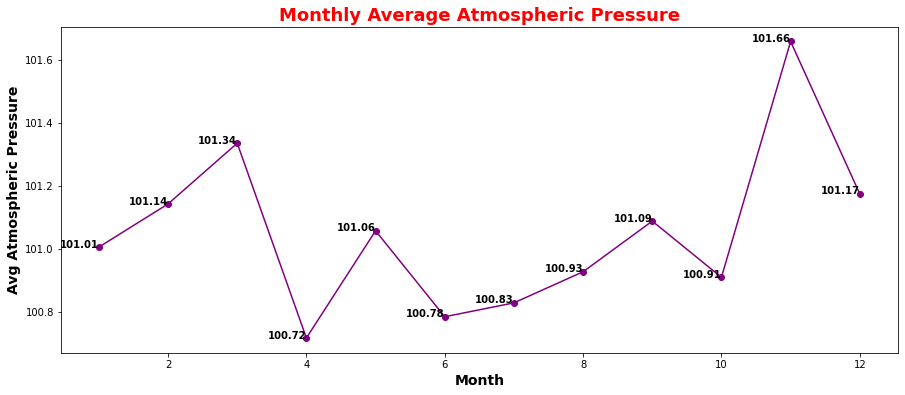

In [26]:
monthly_avg_Pressure = df.groupby(df['Date/Time'].dt.month)['Press_kPa'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_avg_Pressure, marker='o', linestyle='-', color='purple')

for month, press in monthly_avg_Pressure.items():
    plt.text(month, press, f'{press:.2f}', ha='right', fontweight='bold', color='black') 

plt.title('Monthly Average Atmospheric Pressure', color='red', fontweight='bold', fontsize=18)
plt.xlabel('Month', color='black', fontweight='bold', fontsize=14)
plt.ylabel('Avg Atmospheric Pressure', color='black', fontweight='bold', fontsize=14)
plt.show()